In [1]:
import pandas as pd

# 1. โหลดไฟล์ (อยู่โฟลเดอร์ Downloads เดียวกับ notebook)
path = "international_transport.csv"

df = pd.read_csv(path)

# 2. ดูขนาดและตัวอย่าง 5 แถวแรก
print(df.shape)
df.head()

(112791, 30)


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Unnamed: 5,COUNTERPART_AREA,Unnamed: 7,MEASURE,Unnamed: 9,...,OBS_VALUE,Unnamed: 21,OBS_STATUS,Unnamed: 23,METHODOLOGY_TYPE,Unnamed: 25,UNIT_MULT,Unnamed: 27,DECIMALS,Unnamed: 29
0,DATAFLOW,OECD.SDD.TPS:DSD_ITIC@DF_ITIC(1.0),NaN,I,VNM,NaN,ALB,NaN,C_F,NaN,...,7.747148,NaN,I,NaN,ME,NaN,0,NaN,2,NaN
1,DATAFLOW,OECD.SDD.TPS:DSD_ITIC@DF_ITIC(1.0),NaN,I,VNM,NaN,DZA,NaN,C_F,NaN,...,7.265094,NaN,I,NaN,ME,NaN,0,NaN,2,NaN
2,DATAFLOW,OECD.SDD.TPS:DSD_ITIC@DF_ITIC(1.0),NaN,I,VNM,NaN,DZA,NaN,C_F,NaN,...,8.073024,NaN,I,NaN,ME,NaN,0,NaN,2,NaN
3,DATAFLOW,OECD.SDD.TPS:DSD_ITIC@DF_ITIC(1.0),NaN,I,VNM,NaN,BHS,NaN,C_F,NaN,...,9.087164,NaN,I,NaN,ME,NaN,0,NaN,2,NaN
4,DATAFLOW,OECD.SDD.TPS:DSD_ITIC@DF_ITIC(1.0),NaN,I,VNM,NaN,BHS,NaN,C_F,NaN,...,7.357178,NaN,I,NaN,ME,NaN,0,NaN,2,NaN


In [2]:
df.columns.tolist()

['STRUCTURE',
 'STRUCTURE_ID',
 'STRUCTURE_NAME',
 'ACTION',
 'REF_AREA',
 'Unnamed: 5',
 'COUNTERPART_AREA',
 'Unnamed: 7',
 'MEASURE',
 'Unnamed: 9',
 'PRODUCT_TYPE',
 'Unnamed: 11',
 'COMM_HS2017',
 'Unnamed: 13',
 'FREQ',
 'Unnamed: 15',
 'UNIT_MEASURE',
 'Unnamed: 17',
 'TIME_PERIOD',
 'Unnamed: 19',
 'OBS_VALUE',
 'Unnamed: 21',
 'OBS_STATUS',
 'Unnamed: 23',
 'METHODOLOGY_TYPE',
 'Unnamed: 25',
 'UNIT_MULT',
 'Unnamed: 27',
 'DECIMALS',
 'Unnamed: 29']

In [3]:
# drop all Unnamed columns
df_clean = df.loc[:, ~df.columns.str.contains('^Unnamed')].copy()

df_clean.columns

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'COUNTERPART_AREA', 'MEASURE', 'PRODUCT_TYPE', 'COMM_HS2017', 'FREQ',
       'UNIT_MEASURE', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_STATUS',
       'METHODOLOGY_TYPE', 'UNIT_MULT', 'DECIMALS'],
      dtype='object')

In [4]:
df_clean.columns = df_clean.columns.str.strip()

In [5]:
df_clean["OBS_VALUE"]   = pd.to_numeric(df_clean["OBS_VALUE"], errors="coerce")
df_clean["TIME_PERIOD"] = pd.to_numeric(df_clean["TIME_PERIOD"], errors="coerce")

In [6]:
cols = [
    "REF_AREA",          # ประเทศผู้นำเข้า
    "COUNTERPART_AREA",  # ประเทศผู้ส่งออก
    "MEASURE",           # C_F = CIF/FOB margin
    "PRODUCT_TYPE",      
    "COMM_HS2017",       # HS code
    "TIME_PERIOD",
    "OBS_VALUE"
]

df_itic = df_clean[cols].copy()
df_itic.head()

,REF_AREA,COUNTERPART_AREA,MEASURE,PRODUCT_TYPE,COMM_HS2017,TIME_PERIOD,OBS_VALUE
0,VNM,ALB,C_F,C,HS17_4002,2017,7.747148
1,VNM,DZA,C_F,C,HS17_3812,2017,7.265094
2,VNM,DZA,C_F,C,HS17_4002,2017,8.073024
3,VNM,BHS,C_F,C,HS17_8708,2017,9.087164
4,VNM,BHS,C_F,C,HS17_8703,2017,7.357178


In [7]:
sorted(df_itic["REF_AREA"].unique())

['AUS',
 'DEU',
 'FRA',
 'GBR',
 'IDN',
 'JPN',
 'KHM',
 'KOR',
 'MMR',
 'MYS',
 'SGP',
 'THA',
 'TWN',
 'USA',
 'VNM']

In [8]:
df_itic.groupby("REF_AREA")["COUNTERPART_AREA"].nunique().sort_values(ascending=False).head(20)

REF_AREA
DEU    239
FRA    239
GBR    238
THA    237
KOR    235
MYS    235
TWN    233
IDN    231
SGP    230
USA    230
JPN    226
AUS    223
MMR    216
KHM    214
VNM    214
Name: COUNTERPART_AREA, dtype: int64

In [9]:
df_itic["COMM_HS2017"].value_counts().head(20)

COMM_HS2017
_T           24080
HS17_8708    18256
HS17_8703    11613
HS17_8711     8680
HS17_8712     8183
HS17_4002     7980
HS17_3812     6531
HS17_3913     5838
HS17_8705     5831
HS17_8707     5621
HS17_4003     3892
HS17_8706     3640
HS17_8710     2646
Name: count, dtype: int64

In [10]:
df_itic["OBS_VALUE"].describe()

count    112791.000000
mean          6.731557
std           2.647021
min           0.000000
25%           5.164377
50%           6.828113
75%           8.433603
max          19.080969
Name: OBS_VALUE, dtype: float64

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# ถ้า df_itic ยังไม่ถูกสร้างจาก df_clean ให้แน่ใจว่าใช้คอลัมน์นี้
# df_clean = ... (ตามที่ทำไว้ก่อนหน้า)
# df_itic = df_clean[[
#     "REF_AREA", "COUNTERPART_AREA", "MEASURE",
#     "PRODUCT_TYPE", "COMM_HS2017", "TIME_PERIOD", "OBS_VALUE"
# ]].copy()

# Ensure numeric
df_itic["OBS_VALUE"]   = pd.to_numeric(df_itic["OBS_VALUE"], errors="coerce")
df_itic["TIME_PERIOD"] = pd.to_numeric(df_itic["TIME_PERIOD"], errors="coerce")

df_itic = df_itic.dropna(subset=["OBS_VALUE", "TIME_PERIOD"])

count    112791.000000
mean          6.731557
std           2.647021
min           0.000000
25%           5.164377
50%           6.828113
75%           8.433603
max          19.080969
Name: OBS_VALUE, dtype: float64


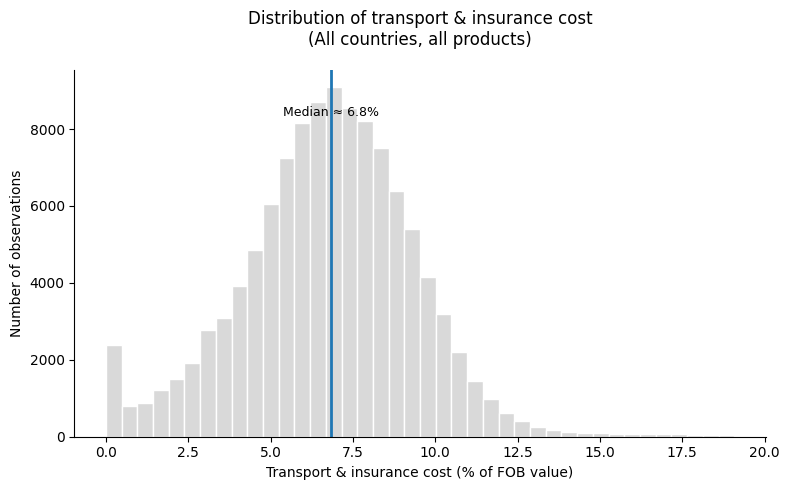

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# เตรียมข้อมูลให้ numeric + drop missing
df_itic["OBS_VALUE"]   = pd.to_numeric(df_itic["OBS_VALUE"], errors="coerce")
df_itic["TIME_PERIOD"] = pd.to_numeric(df_itic["TIME_PERIOD"], errors="coerce")
df_itic = df_itic.dropna(subset=["OBS_VALUE", "TIME_PERIOD"])

s = df_itic["OBS_VALUE"]

# สถิติเบื้องต้น
median_val = s.median()
p90_val    = s.quantile(0.90)

print(s.describe())

# ===== Plot แบบ Ms. Cole =====
fig, ax = plt.subplots(figsize=(8, 5))

# Histogram หลัก
ax.hist(s, bins=40, color="#d9d9d9", edgecolor="white")

# ตัด chart junk
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xlabel("Transport & insurance cost (% of FOB value)")
ax.set_ylabel("Number of observations")

# title + subtitle แทน text ลอย
ax.set_title(
    "Distribution of transport & insurance cost\n(All countries, all products)",
    pad=18,
)

# เส้น median เน้นด้วยสีเดียว
ax.axvline(median_val, color="#1f77b4", linewidth=2)

# ใส่ label median ด้านบนเส้น (ใช้พิกัดใน data space เลย จะไม่ไปทับ title)
y_max = ax.get_ylim()[1]
ax.text(
    median_val,
    y_max * 0.9,
    f"Median ≈ {median_val:.1f}%",
    ha="center",
    va="top",
    fontsize=9,
)

plt.tight_layout()
plt.show()

In [24]:
# เลือกไทยเป็นผู้นำเข้า
df_tha = df_itic[df_itic["REF_AREA"] == "THA"].copy()

# เฉลี่ย margin ต่อประเทศคู่ค้า
route_tha = (
    df_tha.groupby("COUNTERPART_AREA")["OBS_VALUE"]
          .mean()
          .sort_values(ascending=False)
)

# Top 15 เส้นทางแพงสุด
top15_expensive = route_tha.head(15)
print("Top 15 most expensive routes for THA (all products):")
display(top15_expensive)

# Top 15 เส้นทางถูกสุด
top15_cheap = route_tha.tail(15)
print("Top 15 cheapest routes for THA (all products):")
display(top15_cheap)

Top 15 most expensive routes for THA (all products):


COUNTERPART_AREA
ABW    12.937851
IRQ    12.646513
TON    12.442809
HTI    12.115322
SYR    11.897395
VEN    11.342026
TGO    11.057169
TTO    10.747273
VUT    10.724130
HND    10.712524
NGA    10.621490
MTQ    10.568291
AZE    10.512248
PRY    10.479811
GNQ    10.314802
Name: OBS_VALUE, dtype: float64

Top 15 cheapest routes for THA (all products):


COUNTERPART_AREA
SSD    5.508497
ATA    5.506722
UGA    5.500979
WLF    5.353006
PCN    5.314454
MYT    5.207754
MAC    5.189632
SGP    5.005244
COD    4.876495
VNM    4.530357
BGD    4.483888
MYS    3.624953
MMR    2.339186
KHM    1.458275
LAO    1.405129
Name: OBS_VALUE, dtype: float64

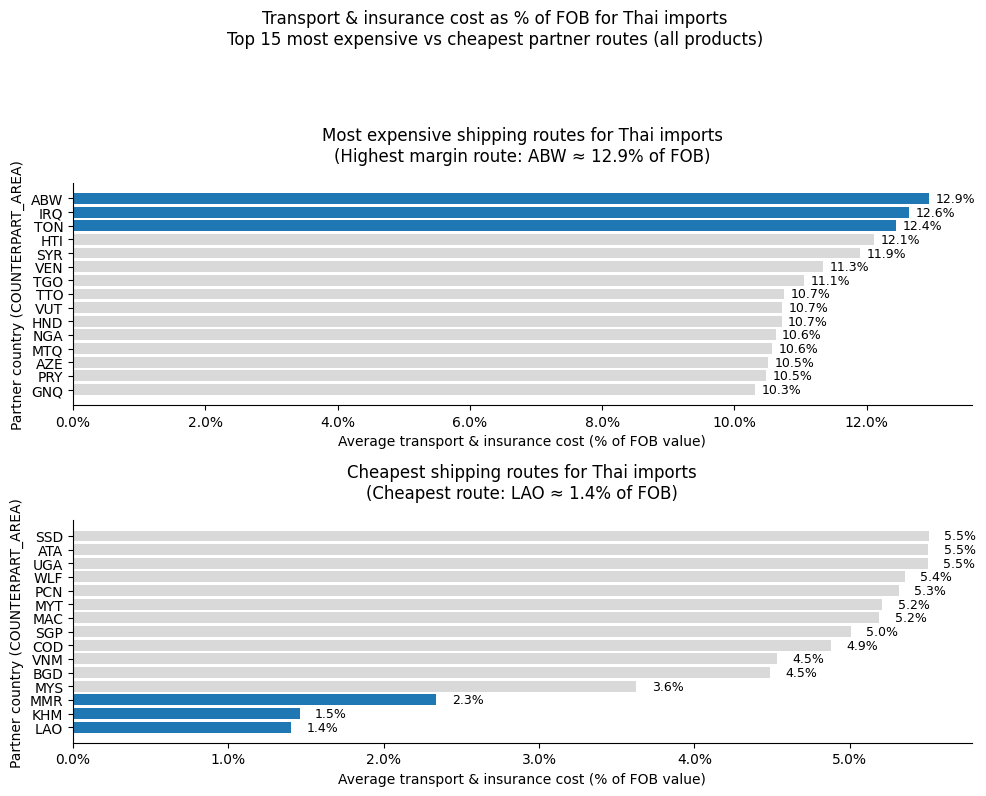

In [45]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# ===== 1) helper: format เป็น % =====
def pct_fmt(x, _):
    return f"{x:.1f}%"

formatter = FuncFormatter(pct_fmt)

# ===== 2) เตรียม Series สำหรับ plot =====
exp_series = top15_expensive.sort_values()   # from lower → higher
cheap_series = top15_cheap.sort_values()     # from cheapest → higher

base_color = "#d9d9d9"
highlight_color = "#1f77b4"
n_highlight = 3

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=False)

# -------------------------------------------------
# PANEL 1: แพงสุด
# -------------------------------------------------
ax = axes[0]

colors_exp = [base_color] * len(exp_series)
for i in range(1, n_highlight + 1):
    colors_exp[-i] = highlight_color

ax.barh(exp_series.index, exp_series.values, color=colors_exp)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel("Average transport & insurance cost (% of FOB value)")
ax.set_ylabel("Partner country (COUNTERPART_AREA)")

max_country = exp_series.index[-1]
max_val = exp_series.values[-1]

# ✅ ใช้ title 2 บรรทัด แทน insight ลอยในกราฟ
ax.set_title(
    "Most expensive shipping routes for Thai imports\n"
    f"(Highest margin route: {max_country} ≈ {max_val:.1f}% of FOB)",
    pad=16,
)

for i, (country, val) in enumerate(zip(exp_series.index, exp_series.values)):
    ax.text(val + 0.1, i, f"{val:.1f}%", va="center", fontsize=9)

# -------------------------------------------------
# PANEL 2: ถูกสุด
# -------------------------------------------------
ax2 = axes[1]

colors_cheap = [base_color] * len(cheap_series)
for i in range(n_highlight):
    colors_cheap[i] = highlight_color

ax2.barh(cheap_series.index, cheap_series.values, color=colors_cheap)

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax2.xaxis.set_major_formatter(formatter)
ax2.set_xlabel("Average transport & insurance cost (% of FOB value)")
ax2.set_ylabel("Partner country (COUNTERPART_AREA)")

min_country = cheap_series.index[0]
min_val = cheap_series.values[0]

ax2.set_title(
    "Cheapest shipping routes for Thai imports\n"
    f"(Cheapest route: {min_country} ≈ {min_val:.1f}% of FOB)",
    pad=16,
)

for i, (country, val) in enumerate(zip(cheap_series.index, cheap_series.values)):
    ax2.text(val + 0.1, i, f"{val:.1f}%", va="center", fontsize=9)

# -------------------------------------------------
# SUPER TITLE + layout
# -------------------------------------------------
fig.suptitle(
    "Transport & insurance cost as % of FOB for Thai imports\n"
    "Top 15 most expensive vs cheapest partner routes (all products)",
    fontsize=12,
    y=0.99,
)

# เว้นพื้นที่ด้านบนให้ suptitle
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

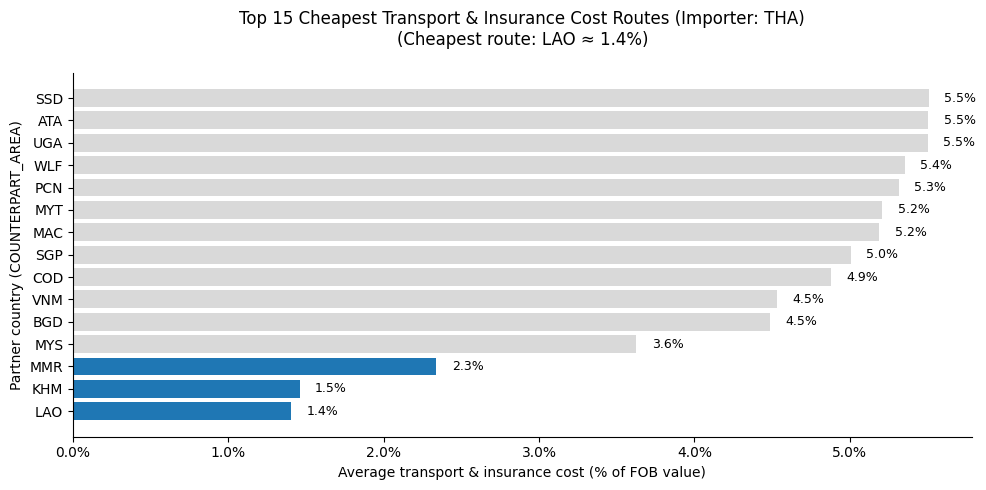

In [46]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# ===== Helper: format % =====
def pct_fmt(x, _):
    return f"{x:.1f}%"

formatter = FuncFormatter(pct_fmt)

cheap_series = top15_cheap.sort_values()

base_color = "#d9d9d9"
highlight_color = "#1f77b4"
colors = [highlight_color if i < 3 else base_color for i in range(len(cheap_series))]

fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(cheap_series.index, cheap_series.values, color=colors)

# clean look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_major_formatter(formatter)

ax.set_xlabel("Average transport & insurance cost (% of FOB value)")
ax.set_ylabel("Partner country (COUNTERPART_AREA)")

# ---- ใส่ตัวเลขท้ายแท่ง ----
for i, (country, val) in enumerate(zip(cheap_series.index, cheap_series.values)):
    ax.text(val + 0.1, i, f"{val:.1f}%", va="center", fontsize=9)

# ---- Insight แบบไม่เหลื่อม ----
min_country = cheap_series.index[0]
min_val = cheap_series.values[0]

ax.set_title(
    "Top 15 Cheapest Transport & Insurance Cost Routes (Importer: THA)\n"
    f"(Cheapest route: {min_country} ≈ {min_val:.1f}%)",
    pad=20     # เว้นระยะจากกราฟ → title ไม่ทับ insight
)

plt.tight_layout()
plt.show()

In [16]:
auto_hs = ["HS17_8703", "HS17_8708", "HS17_8711", "HS17_8712"]

df_tha_auto = df_tha[df_tha["COMM_HS2017"].isin(auto_hs)].copy()

# เส้นทางนำเข้ายานยนต์ที่แพงสุดของไทย
auto_routes_tha = (
    df_tha_auto.groupby(["COMM_HS2017", "COUNTERPART_AREA"])["OBS_VALUE"]
              .mean()
              .sort_values(ascending=False)
)

auto_routes_tha.head(20)

COMM_HS2017  COUNTERPART_AREA
HS17_8712    IRQ                 13.470835
             VEN                 13.292195
HS17_8708    ABW                 13.094335
             TON                 12.843118
HS17_8712    SYR                 12.745033
             NGA                 12.621662
HS17_8708    IRQ                 12.597922
HS17_8712    AZE                 12.479108
             IRN                 12.164541
HS17_8708    HTI                 12.153094
HS17_8712    HND                 11.882080
HS17_8708    SYR                 11.864669
             VEN                 11.820774
HS17_8712    LBN                 11.753260
             GHA                 11.714718
             PER                 11.635970
HS17_8708    TGO                 11.497262
HS17_8712    COL                 11.426757
             CRI                 11.409418
             GMB                 11.354522
Name: OBS_VALUE, dtype: float64

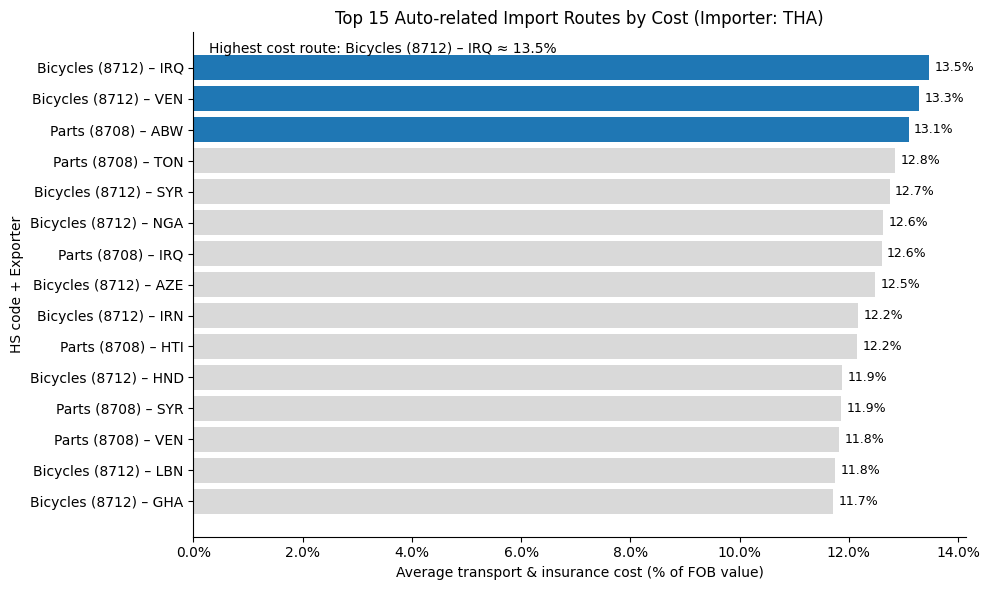

In [35]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# ===== 1) helper: format เป็นเปอร์เซ็นต์ =====
def pct_fmt(x, _):
    return f"{x:.1f}%"

formatter = FuncFormatter(pct_fmt)

# ===== 2) เตรียมข้อมูลจาก top15_auto (MultiIndex: COMM_HS2017, COUNTERPART_AREA) =====
top15_auto_df = top15_auto.reset_index()  # columns: COMM_HS2017, COUNTERPART_AREA, OBS_VALUE

# ตรงนี้คือจุดที่ error เมื่อกี้ แก้เป็นใช้ชื่อคอลัมน์สุดท้ายแทน
value_col = top15_auto_df.columns[-1]     # น่าจะเป็น 'OBS_VALUE'
top15_auto_df = top15_auto_df.rename(columns={value_col: "margin"})

# mapping ชื่อ HS ให้คนอ่านง่ายขึ้น (จะใช้หรือไม่ใช้ก็ได้)
hs_labels = {
    "HS17_8703": "Cars (8703)",
    "HS17_8708": "Parts (8708)",
    "HS17_8711": "Motorcycles (8711)",
    "HS17_8712": "Bicycles (8712)",
}

# สร้าง label ที่อ่านรู้เรื่อง: "Cars (8703) – JPN"
top15_auto_df["label"] = top15_auto_df.apply(
    lambda row: f"{hs_labels.get(row['COMM_HS2017'], row['COMM_HS2017'])} – {row['COUNTERPART_AREA']}",
    axis=1,
)

# sort จาก margin ต่ำ → สูง เพื่อให้ barh เรียงสวย (แพงสุดอยู่ข้างบน)
top15_auto_df = top15_auto_df.sort_values("margin", ascending=True)

# ===== 3) สีสไตล์ SWD =====
base_color = "#d9d9d9"
highlight_color = "#1f77b4"

# highlight 3 เส้นที่แพงที่สุด (ท้ายตาราง)
colors = [base_color] * len(top15_auto_df)
n_highlight = 3
for i in range(1, n_highlight + 1):
    colors[-i] = highlight_color

# ===== 4) วาดกราฟ =====
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(top15_auto_df["label"], top15_auto_df["margin"], color=colors)

# ตัด chart junk
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# แกน x เป็น %
ax.xaxis.set_major_formatter(formatter)

ax.set_xlabel("Average transport & insurance cost (% of FOB value)")
ax.set_ylabel("HS code + Exporter")
ax.set_title("Top 15 Auto-related Import Routes by Cost (Importer: THA)")

# ใส่ตัวเลข % ท้ายแท่ง
for i, (lbl, val) in enumerate(zip(top15_auto_df["label"], top15_auto_df["margin"])):
    ax.text(val + 0.1, i, f"{val:.1f}%", va="center", fontsize=9)

# ===== 5) Insight สั้น ๆ ด้านบนกราฟ =====
top_row = top15_auto_df.iloc[-1]

ax.text(
    0.02,
    0.98,  # <= อยู่ในช่วง [0, 1] จะไม่ไปทับ title แล้ว
    f"Highest cost route: {hs_labels.get(top_row['COMM_HS2017'], top_row['COMM_HS2017'])} – "
    f"{top_row['COUNTERPART_AREA']} ≈ {top_row['margin']:.1f}%",
    transform=ax.transAxes,
    fontsize=10,
    ha="left",
    va="top",   # ยึดด้านบนของข้อความให้เกาะ y=0.98 สวย ๆ
)


plt.tight_layout()
plt.show()

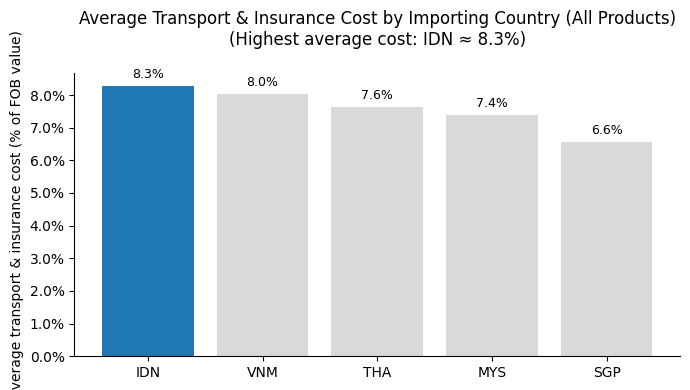

In [43]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def pct_fmt(x, _):
    return f"{x:.1f}%"

avg_by_country_sorted = avg_by_country.sort_values(ascending=False)

base_color = "#d9d9d9"
highlight_color = "#1f77b4"
colors = [highlight_color] + [base_color] * (len(avg_by_country_sorted) - 1)

fig, ax = plt.subplots(figsize=(7, 4))

ax.bar(avg_by_country_sorted.index, avg_by_country_sorted.values, color=colors)

# clean
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_major_formatter(FuncFormatter(pct_fmt))

ax.set_ylabel("Average transport & insurance cost (% of FOB value)")

# ---- คำนวณ insight ----
top_country = avg_by_country_sorted.index[0]
top_value = avg_by_country_sorted.values[0]

# ---- ใช้ title 2 บรรทัด แทน ax.text ----
ax.set_title(
    "Average Transport & Insurance Cost by Importing Country (All Products)\n"
    f"(Highest average cost: {top_country} ≈ {top_value:.1f}%)",
    pad=20,   # เว้นระยะจากกราฟ
)

# ใส่ตัวเลขบนแท่ง
for i, (country, val) in enumerate(zip(avg_by_country_sorted.index, avg_by_country_sorted.values)):
    ax.text(i, val + 0.15, f"{val:.1f}%", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

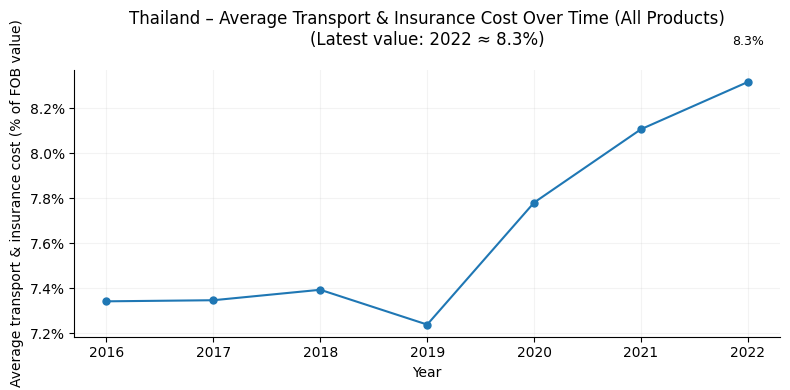

In [57]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# helper: format %
def pct_fmt(x, _):
    return f"{x:.1f}%"

# เตรียมข้อมูล trend ของไทย (เรียงตามปี)
trend = tha_trend.sort_index()

line_color = "#1f77b4"

fig, ax = plt.subplots(figsize=(8, 4))

# เส้น trend
ax.plot(trend.index, trend.values, color=line_color, marker="o", markersize=5)

# ตัด chart junk
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ใช้ % บนแกน y
ax.yaxis.set_major_formatter(FuncFormatter(pct_fmt))

ax.set_ylabel("Average transport & insurance cost (% of FOB value)")
ax.set_xlabel("Year")

# ปีล่าสุด + ค่า
last_year = trend.index[-1]
last_val = trend.values[-1]

# title + subtitle แบบ Ms. Cole (ไม่ต้องใช้ ax.text(transAxes) แล้ว)
ax.set_title(
    "Thailand – Average Transport & Insurance Cost Over Time (All Products)\n"
    f"(Latest value: {last_year} ≈ {last_val:.1f}%)",
    pad=18,
)

# ใส่ตัวเลขบนจุดปีล่าสุด (อยู่ใน data space ไม่ทับ title)
ax.text(
    last_year,
    last_val + 0.15,
    f"{last_val:.1f}%",
    ha="center",
    va="bottom",
    fontsize=9,
)

# grid เบา ๆ
ax.grid(True, alpha=0.15)

plt.tight_layout()
plt.show()

In [20]:
# สรุปเส้นทางไทยทั้งหมด
summary_routes_tha = (
    df_tha.groupby("COUNTERPART_AREA")["OBS_VALUE"]
          .agg(["count", "mean", "min", "max"])
          .sort_values("mean", ascending=False)
)

summary_routes_tha.to_csv("tha_routes_summary.csv")

# สรุปยานยนต์
summary_auto_tha = (
    df_tha_auto.groupby(["COMM_HS2017", "COUNTERPART_AREA"])["OBS_VALUE"]
              .agg(["count", "mean", "min", "max"])
              .sort_values("mean", ascending=False)
)

summary_auto_tha.to_csv("tha_auto_routes_summary.csv")

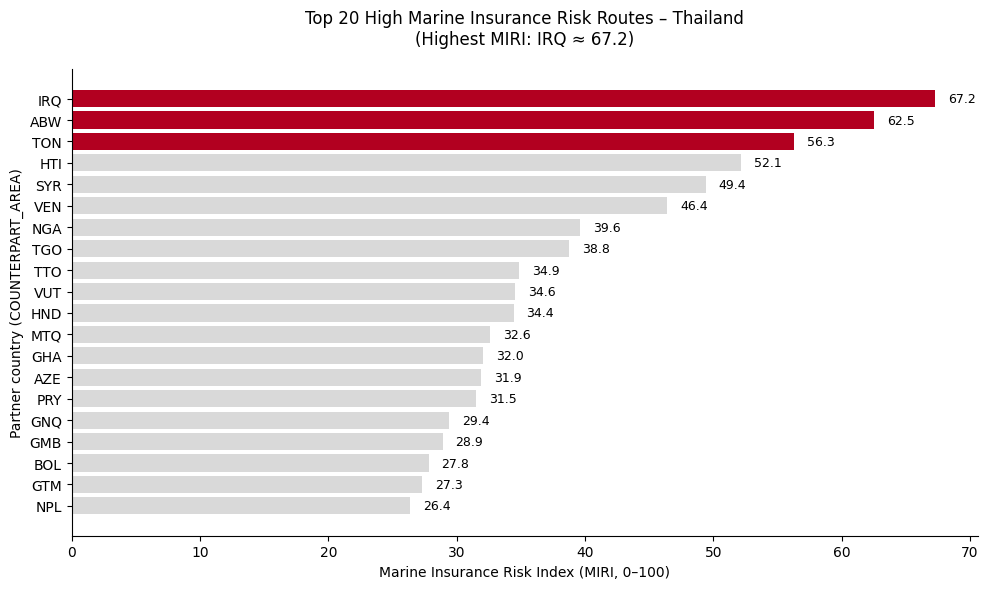

In [58]:
import matplotlib.pyplot as plt

# ---- เตรียมข้อมูลสำหรับกราฟ ----
# เรียงจาก MIRI ต่ำ → สูง แล้วใช้ barh (บน = เสี่ยงสุด)
high_risk_plot = high_risk_routes.sort_values("MIRI", ascending=True).copy()

base_color = "#d9d9d9"
highlight_color = "#b20020"  # crimson tone

# เน้น 3 เส้นทางเสี่ยงสุด
n_highlight = 3
colors = [base_color] * len(high_risk_plot)
for i in range(1, n_highlight + 1):
    colors[-i] = highlight_color

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(
    high_risk_plot["COUNTERPART_AREA"],
    high_risk_plot["MIRI"],
    color=colors
)

# ตัด chart junk
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xlabel("Marine Insurance Risk Index (MIRI, 0–100)")
ax.set_ylabel("Partner country (COUNTERPART_AREA)")

# route เสี่ยงสุดไว้ใช้ใน subtitle
top_row = high_risk_plot.iloc[-1]

ax.set_title(
    "Top 20 High Marine Insurance Risk Routes – Thailand\n"
    f"(Highest MIRI: {top_row['COUNTERPART_AREA']} ≈ {top_row['MIRI']:.1f})",
    pad=18,
)

# ใส่ตัวเลขที่ปลายแท่ง
for i, (country, val) in enumerate(
    zip(high_risk_plot["COUNTERPART_AREA"], high_risk_plot["MIRI"])
):
    ax.text(
        val + 1,      # ขยับออกจากปลายแท่งเล็กน้อย
        i,
        f"{val:.1f}",
        va="center",
        fontsize=9
    )

plt.tight_layout()
plt.show()

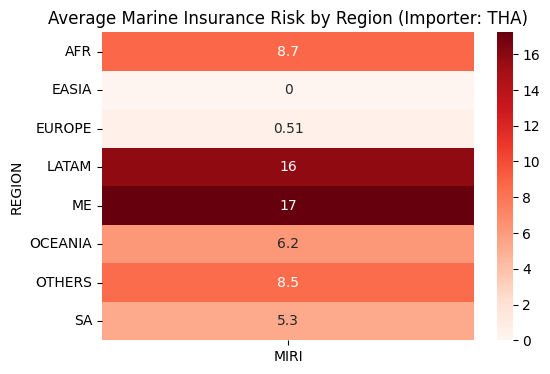

In [55]:
import seaborn as sns
pivot = route_stats.pivot_table(
    index="REGION",
    values="MIRI",
    aggfunc="mean"
)

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, cmap="Reds")
plt.title("Average Marine Insurance Risk by Region (Importer: THA)")
plt.show()